# <span style="color:blue">MBA em Ciência de Dados</span>
# <span style="color:blue">Análise de Dados com Base em Processamento Massivo em Paralelo</span>

## <span style="color:blue">Aula 07: Consultas OLAP usando Spark SQL</span>
## <span style="color:blue">Apache Spark SQL</span>

**Material Produzido por:**<br>
>**Profa. Dra. Cristina Dutra de Aguiar**<br>

**CEMEAI - ICMC/USP São Carlos**

Esta lista contém os exercícios referentes à Aula 07. Por favor, procurem por "Exerício" para encontrar a especificação dos exercícios. Também é possível localizar os exercícios utilizando o menu de navegação. Por completude, o *notebook* possui todas as descrições apresentadas na parte prática da Aula 07. Recomenda-se fortemente que a lista de exercícios seja respondida antes de se consultar as respostas dos exercícios.

**IMPORTANTE: O uso do *framework* Spark requer diversas configurações no ambiente de desenvolvimento para executar o *notebook*. Dado que tal complexidade foge do escopo de nossa disciplina, recomenda-se que o *notebook* seja executado na plataforma de desenvolvimento COLAB. O uso do COLAB  proporciona um ambiente de desenvolvimento pré-configurado e remove a complexidade de instalação e configuração de pacotes e *frameworks* que são utilizados na disciplina.** 


#1 Otimizador de Consultas Catalyst

O componente mais importante do Spark SQL é o seu otimizador de consultas, chamado Catalyst. Catalyst é baseado em construtores de programação funcional e é implementado na linguagem de programação Scala. Sua implementação tem dois propósitos principais. O primeiro é permitir que novas técnicas de otimização e novas características possam ser facilmente adicionadas ao Spark SQL. O segundo propósito consiste em possibilitar que desenvolvedores externos estendam o otimizador de consultas, por exemplo, adicionando novas regras de otimização e provendo suporte para novos tipos de dados, dentre outros.

## 1.1 Plano de Consulta

Dada uma consulta em alto nível, existem diferentes estratégias de execução (ou seja, planos de consulta) alternativas para se processar essa consulta, principalmente se ela for complexa. A otimização de consultas consiste no processo de gerar e selecionar o plano de consulta mais eficiente dentre as diversas possibilidades disponíveis, ou seja, consiste no processo de selecionar o plano de consulta de menor custo. 

De fato, a quantidade de possíveis planos de consulta que podem ser gerados para processar uma consulta pode ser muito grande. Assim, no processamento de uma consulta, nem todos os planos possíveis são gerados e analisados, uma vez que o tempo gasto nesta atividade seria provavelmente excessivo, talvez superando o tempo de responder à consulta por meio de uma busca sequencial. Heurísticas são usualmente empregadas para diminuir o espaço de busca. 

Portanto, o otimizador de consultas em geral não produz uma solução que é a ótima ou de menor custo frente a todas as possibilidades existentes, mas produz uma solução que é a melhor frente a algumas dessas possibilidades. 




##1.2 Técnicas de Otimização

Duas técnicas amplamente utilizadas pelo otimizador de consultas são descritas a seguir.

- Otimização baseada em regras. O otimizador de consultas baseado em regras tem por objetivo gerar apenas um subconjunto de planos a serem analisados, usado como base heurísticas. Cada plano gerado pelo otimizador de consultas baseado em regras consiste de uma expressão algébrica que determina a ordem na qual as operações deve ser executadas, de forma que todos os planos para uma determinada consulta sejam equivalentes.

- Otimização baseada em custo. O otimizador de consultas baseado em custo identifica, para cada plano gerado, o custo para processar a consulta, e seleciona o plano de menor custo. Isso depende de diversos fatores, tais como quais as operações algébricas que encontram-se efetivamente implementadas por meio de algoritmos disponilizados e os índices disponíveis para processar a consulta. 

Catalyst realiza otimização de consultas baseada em regras e otimização de consultas baseada em custo para transformar uma consulta escrita em SQL em códigos que executam sobre RDDs e utilizam os princípios do modelo MapReduce e do sistema de arquivos distribuídos HDFS.




# 2 Constelação de Fatos da BI Solutions

A aplicação de *data warehousing* da BI Solutions utiliza como base uma constelação de fatos, conforme descrita a seguir.

**Tabelas de dimensão**

- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- funcionario (funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cargo (cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel)
- cliente (clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla)

**Tabelas de fatos**
- pagamento (dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamentos)
- negociacao (dataPK, equipePK, clientePK, receita, quantidadeNegociacoes)


## 2.1 Baixando o Módulo wget

Para baixar os dados referentes ao esquema relacional da constelação de fatos da BI Solutions, é utilizado o módulo  **wget**. O comando a seguir realiza a instalação desse módulo. <br>

In [ ]:
#instalando o módulo wget
%%capture
!pip install -q wget
#criando pasta para salvar as bases de dados
!mkdir data

## 2.2 Obtenção dos Dados das Tabelas de Dimensão

Os comandos a seguir baixam os dados que povoam as tabelas de dimensão. 

In [ ]:
#baixando os dados das tabelas de dimensão
import wget

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/data.csv"
wget.download(url, "data/data.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/funcionario.csv"
wget.download(url, "data/funcionario.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/equipe.csv"
wget.download(url, "data/equipe.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cargo.csv"
wget.download(url, "data/cargo.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cliente.csv"
wget.download(url, "data/cliente.csv")

'data/cliente (1).csv'

## 2.3 Obtenção dos Dados Tabelas de Fatos

Os comandos a seguir baixam os dados que povoam as tabelas de fatos. 

In [ ]:
#baixando os dados das tabelas de fatos
url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/pagamento.csv"
wget.download(url, "data/pagamento.csv")

url = "https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/negociacao.csv"
wget.download(url, "data/negociacao.csv")

'data/negociacao (1).csv'

# 3 Apache Spark Cluster

## 3.1 Instalação

Neste *notebook* é criado um *cluster* Spark composto apenas por um **nó mestre**. Ou seja, o *cluster* não possui um ou mais **nós de trabalho** e o **gerenciador de cluster**. Nessa configuração, as tarefas (*tasks*) são realizadas no próprio *driver* localizado no **nó mestre**.

Para que o cluster possa ser criado, primeiramente é instalado o Java Runtime Environment (JRE) versão 8. 

In [ ]:
#instalando Java Runtime Environment (JRE) versão 8
%%capture
!apt-get remove openjdk*
!apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Na sequência, é feito o *download* do Apache Spark versão 3.0.0.

In [ ]:
#baixando Apache Spark versão 3.0.0
%%capture
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz && rm spark-3.0.0-bin-hadoop2.7.tgz

Na sequência, são configuradas as variáveis de ambiente JAVA_HOME e SPARK_HOME. Isto permite que tanto o Java quanto o Spark possam ser encontrados.

In [ ]:
import os
#configurando a variável de ambiente JAVA_HOME
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#configurando a variável de ambiente SPARK_HOME
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

Por fim, são instalados dois pacotes da linguagem de programação Python, cujas funcionalidades são descritas a seguir.

> **Pacote findspark:** Usado para ler a variável de ambiente SPARK_HOME e armazenar seu valor na variável dinâmica de ambiente PYTHONPATH. Como resultado, Python pode encontrar a instalação do Spark. 

> **Pacote pyspark:** PySpark é a API do Python para Spark. Ela possibilita o uso de Python, considerando que o *framework* Apache Spark encontra-se desenvolvido na linguagem de programação Scala. 

In [ ]:
%%capture
#instalando o pacote findspark
!pip install -q findspark==1.4.2
#instalando o pacote pyspark
!pip install -q pyspark==3.0.0

## 3.2 Conexão

PySpark não é adicionado ao *sys.path* por padrão. Isso significa que não é possível importá-lo, pois o interpretador da linguagem Python não sabe onde encontrá-lo. 

Para resolver esse aspecto, é necessário instalar o módulo `findspark`. Esse módulo mostra onde PySpark está localizado. Os comandos a seguir têm essa finalidade.


In [ ]:
#importando o módulo findspark
import findspark
#carregando a variávels SPARK_HOME na variável dinâmica PYTHONPATH
findspark.init()

Depois de configurados os pacotes e módulos e inicializadas as variáveis de ambiente, é possível iniciar o uso do Spark na aplicação de `data warehousing`. Para tanto, é necessário importar o comando `SparkSession` do módulo `pyspark.sql`. São utilizados os seguintes conceitos: <br>

- `SparkSession`: permite a criação de `DataFrames`. Como resultado, as tabelas relacionais podem ser manipuladas por meio de `DataFrames` e é possível realizar consultas OLAP por meio de comandos SQL. <br>
- `builder`: cria uma instância de SparkSession. <br>
- `appName`: define um nome para a aplicação, o qual pode ser visto na interface de usuário web do Spark. <br> 
- `master`: define onde está o nó mestre do *cluster*. Como a aplicação é executada localmente e não em um *cluster*, indica-se isso pela *string* `local` seguida do parâmetro `[*]`. Ou seja, define-se que apenas núcleos locais são utilizados. 
- `getOrCreate`: cria uma SparkSession. Caso ela já exista, retorna a instância existente. 


**Observação**: A lista completa de todos os parâmetros que podem ser utilizados na inicialização do *cluster* pode ser encontrada neste [link](https://spark.apache.org/docs/latest/spark-standalone.html#cluster-launch-scripts).

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("pyspark-notebook").master("local[*]").getOrCreate()

# 4 Preparação dos Dados


## 4.1 Geração dos DataFrames

Para a leitura dos dados dos arquivos .csv, é utilizado o método `spark.read.csv`. Seus parâmetros são:


- `path`: endereço do arquivo que é lido.
- `header`: indica se o arquivo possui um cabeçalho.
- `sep`: especifica o caractere que separa os campos do arquivo.



In [ ]:
#criando e exibindo o DataFrame para a tabela de dimensão cargo
cargo = spark.read.csv(path="data/cargo.csv", header=True, sep=",")
cargo.show(5)


+-------+--------------------+-------------------+--------------------+-----------------------+----------+
|cargoPK|           cargoNome|cargoRegimeTrabalho|cargoJornadaTrabalho|cargoEscolaridadeMinima|cargoNivel|
+-------+--------------------+-------------------+--------------------+-----------------------+----------+
|      1|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|                  MEDIO|    JUNIOR|
|      2|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|               SUPERIOR|     PLENO|
|      3|PROGRAMADOR DE SI...|         TEMPORARIO|                 20H|                    POS|    SENIOR|
|      4|PROGRAMADOR DE SI...|         TEMPORARIO|                 40H|                  MEDIO|    JUNIOR|
|      5|PROGRAMADOR DE SI...|         TEMPORARIO|                 40H|               SUPERIOR|     PLENO|
+-------+--------------------+-------------------+--------------------+-----------------------+----------+
only showing top 5 rows



In [ ]:
#criando e exibindo o DataFrame para a tabela de dimensão cliente
cliente = spark.read.csv(path="data/cliente.csv", header=True, sep=",")
cliente.show(5)

+---------+-------------------+-------------------+-------------+-----------------+------------------+-----------------+------------------+---------------+----------------+
|clientePK|clienteNomeFantasia|       clienteSetor|clienteCidade|clienteEstadoNome|clienteEstadoSigla|clienteRegiaoNome|clienteRegiaoSigla|clientePaisNome|clientePaisSigla|
+---------+-------------------+-------------------+-------------+-----------------+------------------+-----------------+------------------+---------------+----------------+
|        1|           VIA FOOD|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|                SE|         BRASIL|              BR|
|        2|          VIA PIZZA|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|                SE|         BRASIL|              BR|
|        3|           VIA JAPA|BEBIDAS E ALIMENTOS|    SAO PAULO|        SAO PAULO|                SP|          SUDESTE|               

In [ ]:
#criando e exibindo o DataFrame para a tabela de dimensão data
data = spark.read.csv(path="data/data.csv", header=True, sep=",") 
data.show(5)

+------+------------+-------+-------+------------+-------------+------------+-------+
|dataPK|dataCompleta|dataDia|dataMes|dataBimestre|dataTrimestre|dataSemestre|dataAno|
+------+------------+-------+-------+------------+-------------+------------+-------+
|     1|    1/1/2016|      1|      1|           1|            1|           1|   2016|
|     2|    2/1/2016|      2|      1|           1|            1|           1|   2016|
|     3|    3/1/2016|      3|      1|           1|            1|           1|   2016|
|     4|    4/1/2016|      4|      1|           1|            1|           1|   2016|
|     5|    5/1/2016|      5|      1|           1|            1|           1|   2016|
+------+------------+-------+-------+------------+-------------+------------+-------+
only showing top 5 rows



In [ ]:
#criando e exibindo o DataFrame para a tabela de dimensão equipe
equipe = spark.read.csv(path="data/equipe.csv", header=True, sep=",")
equipe.show(5)

+--------+-------------+--------------------+--------------+------------------+-----------------+----------------+-----------------+--------------+---------------+
|equipePK|   equipeNome|          filialNome|  filialCidade|  filialEstadoNome|filialEstadoSigla|filialRegiaoNome|filialRegiaoSigla|filialPaisNome|filialPaisSigla|
+--------+-------------+--------------------+--------------+------------------+-----------------+----------------+-----------------+--------------+---------------+
|       1|APP - DESKTOP|SAO PAULO - AV. P...|     SAO PAULO|         SAO PAULO|               SP|         SUDESTE|               SE|        BRASIL|             BR|
|       2|APP - DESKTOP|RIO DE JANEIRO - ...|RIO DE JANEIRO|    RIO DE JANEIRO|               RJ|         SUDESTE|               SE|        BRASIL|             BR|
|       3|          WEB|SAO PAULO - AV. P...|     SAO PAULO|         SAO PAULO|               SP|         SUDESTE|               SE|        BRASIL|             BR|
|       4|      

In [ ]:
#criando e exibindo o DataFrame para a tabela de fatos funcionario
funcionario = spark.read.csv(path="data/funcionario.csv", header=True, sep=",")
funcionario.show(5)

+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|funcPK|funcMatricula|     funcNome|funcSexo|funcDataNascimento|funcDiaNascimento|funcMesNascimento|funcAnoNascimento| funcCidade|funcEstadoNome|funcEstadoSigla|funcRegiaoNome|funcRegiaoSigla|funcPaisNome|funcPaisSigla|
+------+-------------+-------------+--------+------------------+-----------------+-----------------+-----------------+-----------+--------------+---------------+--------------+---------------+------------+-------------+
|     1|          M-1|ALINE ALMEIDA|       F|          1/1/1990|                1|                1|             1990|  SAO PAULO|     SAO PAULO|             SP|       SUDESTE|             SE|      BRASIL|           BR|
|     2|          M-2|   ARAO ALVES|       M|          2/2/1990|                2|                2|             1990|  

In [ ]:
#criando e exibindo o DataFrame para a tabela de fatos negociacao
negociacao = spark.read.csv(path="data/negociacao.csv", header=True, sep=",")
negociacao.show(5)

+--------+---------+------+--------+---------------------+
|equipePK|clientePK|dataPK| receita|quantidadeNegociacoes|
+--------+---------+------+--------+---------------------+
|       2|        9|    22|11564.75|                    1|
|       2|       24|    11| 17990.5|                    1|
|       2|       28|    21| 16335.9|                    1|
|       1|       30|    23| 8495.55|                    1|
|       2|       43|    30|24748.75|                    1|
+--------+---------+------+--------+---------------------+
only showing top 5 rows



In [ ]:
#criando e exibindo o DataFrame para a tabela de fatos pagamento
pagamento = spark.read.csv(path="data/pagamento.csv", header=True, sep=",")
pagamento.show()

+------+--------+------+-------+--------+---------------------+
|funcPK|equipePK|dataPK|cargoPK| salario|quantidadeLancamentos|
+------+--------+------+-------+--------+---------------------+
|   147|       2|     5|     64| 1559.94|                    1|
|   124|       2|     5|    329| 8102.77|                    1|
|   175|       1|     5|    328| 2532.51|                    1|
|   171|       1|     5|    245|  7882.7|                    1|
|   148|       2|     5|     65| 4404.59|                    1|
|     5|       2|     5|    112| 2226.66|                    1|
|   128|       1|     5|    341| 6157.04|                    1|
|    82|       2|     5|     43| 1585.51|                    1|
|    28|       1|     5|    253| 1594.02|                    1|
|    46|       1|     5|    390| 9880.16|                    1|
|    91|       2|     5|    233|10931.47|                    1|
|   176|       2|     5|    241| 2005.49|                    1|
|   172|       1|     5|    351|14218.28

## 4.2 Criação de Visões Temporárias

Para que seja possível executar consultas SQL usando Spark SQL, é necessário criar visões temporárias. Uma visão temporária é uma forma na qual um DataFrame pode ser consultado como se fosse uma tabela.

Para tanto, deve ser utilizado o método  `createOrReplaceTempView` e deve ser passado como parâmetro uma *string* que é o nome da tabela que é criada a partir do DataFrame.  Os comandos a seguir criam uma visão temporária para cada DataFrame da aplicação de *data warehousing*. 
 

In [ ]:
#criando as visões temporárias para as tabelas de dimensão
cargo.createOrReplaceTempView("cargo")
cliente.createOrReplaceTempView("cliente")
data.createOrReplaceTempView("data")
equipe.createOrReplaceTempView("equipe")
funcionario.createOrReplaceTempView("funcionario")

In [ ]:
#criando a visão temporária para as tabelas de fatos
negociacao.createOrReplaceTempView("negociacao")
pagamento.createOrReplaceTempView("pagamento")

# 5 Execução de Consultas com Foco nas Operações OLAP

## 5.1 Operação Slice and Dice 

**Definição**: Restringe os dados sendo analisados a um subconjunto desses dados.

- Slice: corte para um valor fixo, diminuindo a dimensionalidade do cubo.
- Dice: seleção de faixas de valores.

**Exemplo de consulta**: Qual a quantidade de pagamentos realizados no mês de setembro de 2020?

In [ ]:
query = """
SELECT CAST(SUM(quantidadeLancamentos) AS INTEGER) AS `Quantidade de Lançamentos`
FROM data JOIN pagamento ON (data.dataPK = pagamento.dataPK) 
WHERE dataAno = 2020 
      AND dataMes = 9
"""

spark.sql(query).show()

+-------------------------+
|Quantidade de Lançamentos|
+-------------------------+
|                      200|
+-------------------------+



## 5.2 Operações Drill-Down e Roll-Up

**Definição**: Analisam os dados considerando níveis progressivos de agregação.

- Drill-down: níveis de agregação progressivamente mais detalhados, ou de menor granularidade.
- Roll-up: níveis de agregação progressivamente menos detalhados, ou de maior granularidade.

Para ilustrar as operações de drill-down e roll-up, considere a consulta base definida a seguir.

**Consulta base:** Qual o valor gasto em salários por ano, considerando cada **semestre**?

In [ ]:
query = """
SELECT dataAno, dataSemestre, ROUND(SUM(salario),2) AS `Valor gasto em salários por semestre`
FROM data JOIN pagamento ON data.dataPK = pagamento.dataPK 
GROUP BY dataAno, dataSemestre
ORDER BY dataAno, dataSemestre
"""

spark.sql(query).show()

+-------+------------+------------------------------------+
|dataAno|dataSemestre|Valor gasto em salários por semestre|
+-------+------------+------------------------------------+
|   2016|           1|                          2221308.54|
|   2016|           2|                          2221308.54|
|   2017|           1|                           4887639.9|
|   2017|           2|                           4887639.9|
|   2018|           1|                           7467763.2|
|   2018|           2|                           7467763.2|
|   2019|           1|                          9283833.18|
|   2019|           2|                          9283833.18|
|   2020|           1|                          9283833.18|
|   2020|           2|                          9283833.18|
+-------+------------+------------------------------------+



**Exemplo de consulta drill-down:** Qual o valor gasto em salários por ano, considerando cada **trimestre**?

In [ ]:
query = """
SELECT dataAno, dataTrimestre, ROUND(SUM(salario),2) AS `Valor gasto em salários por trimestre`
FROM data JOIN pagamento ON (data.dataPK = pagamento.dataPK) 
GROUP BY dataAno, dataTrimestre
ORDER BY dataAno, dataTrimestre
"""

spark.sql(query).show()

+-------+-------------+-------------------------------------+
|dataAno|dataTrimestre|Valor gasto em salários por trimestre|
+-------+-------------+-------------------------------------+
|   2016|            1|                           1110654.27|
|   2016|            2|                           1110654.27|
|   2016|            3|                           1110654.27|
|   2016|            4|                           1110654.27|
|   2017|            1|                           2443819.95|
|   2017|            2|                           2443819.95|
|   2017|            3|                           2443819.95|
|   2017|            4|                           2443819.95|
|   2018|            1|                            3733881.6|
|   2018|            2|                            3733881.6|
|   2018|            3|                            3733881.6|
|   2018|            4|                            3733881.6|
|   2019|            1|                           4641916.59|
|   2019

**Exemplo de consulta roll-up:** Qual o valor gasto em salários por **ano**?

In [ ]:
query = """
SELECT dataAno, ROUND(SUM(salario),2) AS `Valor gasto em salários por ano`
FROM data JOIN pagamento ON (data.dataPK = pagamento.dataPK) 
GROUP BY dataAno
ORDER BY dataAno
"""

spark.sql(query).show()

+-------+-------------------------------+
|dataAno|Valor gasto em salários por ano|
+-------+-------------------------------+
|   2016|                     4442617.08|
|   2017|                      9775279.8|
|   2018|                   1.49355264E7|
|   2019|                  1.856766636E7|
|   2020|                  1.856766636E7|
+-------+-------------------------------+



## 5.3 Operação Pivot

**Definição:** Reorienta a visão multidimensional dos dados, oferecendo diferentes perspectivas dos mesmos dados.

Para ilustrar a operação pivot, considere a consulta base definida a seguir. 

**Consulta base:**  Qual o valor gasto em salários por ano, considerando cada nível de cargo?

In [ ]:
query = """
SELECT dataAno, cargoNivel, ROUND(SUM(salario),2) AS `Gastos em Salários`
FROM pagamento JOIN data ON pagamento.dataPK = data.dataPK 
               JOIN cargo ON pagamento.cargoPK = cargo.cargoPK 
GROUP BY dataAno, cargoNivel
ORDER BY dataAno, cargoNivel
"""

spark.sql(query).show()

+-------+----------+------------------+
|dataAno|cargoNivel|Gastos em Salários|
+-------+----------+------------------+
|   2016|    JUNIOR|         489456.84|
|   2016|     PLENO|        1454152.44|
|   2016|    SENIOR|         2499007.8|
|   2017|    JUNIOR|         1030642.8|
|   2017|     PLENO|        3791593.92|
|   2017|    SENIOR|        4953043.08|
|   2018|    JUNIOR|         1393282.2|
|   2018|     PLENO|        5357227.44|
|   2018|    SENIOR|        8185016.76|
|   2019|    JUNIOR|        1755714.36|
|   2019|     PLENO|        6132228.24|
|   2019|    SENIOR|     1.067972376E7|
|   2020|    JUNIOR|        1755714.36|
|   2020|     PLENO|        6132228.24|
|   2020|    SENIOR|     1.067972376E7|
+-------+----------+------------------+



**Exemplo de consulta pivot:** Qual o valor gasto em salários por nível de cargo, considerando cada ano?

In [ ]:
query = """
SELECT cargoNivel, dataAno, ROUND(SUM(salario),2) AS `Gastos em Salários`
FROM pagamento JOIN data ON pagamento.dataPK = data.dataPK 
               JOIN cargo ON pagamento.cargoPK = cargo.cargoPK 
GROUP BY cargoNivel, dataAno
ORDER BY cargoNivel, dataAno
"""

spark.sql(query).show()

+----------+-------+------------------+
|cargoNivel|dataAno|Gastos em Salários|
+----------+-------+------------------+
|    JUNIOR|   2016|         489456.84|
|    JUNIOR|   2017|         1030642.8|
|    JUNIOR|   2018|         1393282.2|
|    JUNIOR|   2019|        1755714.36|
|    JUNIOR|   2020|        1755714.36|
|     PLENO|   2016|        1454152.44|
|     PLENO|   2017|        3791593.92|
|     PLENO|   2018|        5357227.44|
|     PLENO|   2019|        6132228.24|
|     PLENO|   2020|        6132228.24|
|    SENIOR|   2016|         2499007.8|
|    SENIOR|   2017|        4953043.08|
|    SENIOR|   2018|        8185016.76|
|    SENIOR|   2019|     1.067972376E7|
|    SENIOR|   2020|     1.067972376E7|
+----------+-------+------------------+



## 5.4 Operação Drill-Across

**Definição:** Compara medidas numéricas de tabelas de fatos diferentes, utilizando pelo menos uma dimensão em comum. 

**Exemplo de consulta:** Qual o total gasto com salários e qual o total de receitas recebidas, considerando cada ano?

In [ ]:
# utilizando a cláusula JOIN ... ON ...
query = """
SELECT anoPag AS `Ano`, ROUND(salario,2) AS `Total Gasto com Salários`, ROUND(receita,2) AS `Total de Receitas Recebidas`
FROM ( SELECT dataAno, SUM(salario)  
       FROM pagamento JOIN data on data.dataPK = pagamento.dataPK
       GROUP BY dataAno
      ) AS pag(anoPag, salario)
     JOIN 
     ( SELECT dataAno, SUM(receita)
       FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK
       GROUP BY dataAno
      ) AS neg(anoNeg, receita) 
     ON anoPag = anoNeg 
ORDER BY anoPag
"""

spark.sql(query).show()

+----+------------------------+---------------------------+
| Ano|Total Gasto com Salários|Total de Receitas Recebidas|
+----+------------------------+---------------------------+
|2016|              4442617.08|                 4614246.95|
|2017|               9775279.8|                 7200423.35|
|2018|            1.49355264E7|              1.159353965E7|
|2019|           1.856766636E7|               3.53533183E7|
|2020|           1.856766636E7|              3.022217595E7|
+----+------------------------+---------------------------+



In [ ]:
# utilizando a cláusula WHERE
query = """
SELECT anoPag AS `Ano`, ROUND(salario,2) AS `Total Gasto com Salários`, ROUND(receita,2) AS `Total de Receitas Recebidas`
FROM ( SELECT dataAno, SUM(salario) 
       FROM pagamento JOIN data on data.dataPK = pagamento.dataPK
       GROUP BY dataAno
      ) AS pag(anoPag, salario), 
     ( SELECT dataAno, SUM(receita)
       FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK
       GROUP BY dataAno
      ) AS neg(anoNeg, receita) 
WHERE anoPag = anoNeg 
ORDER BY anoPag
"""

spark.sql(query).show()

+----+------------------------+---------------------------+
| Ano|Total Gasto com Salários|Total de Receitas Recebidas|
+----+------------------------+---------------------------+
|2016|              4442617.08|                 4614246.95|
|2017|               9775279.8|                 7200423.35|
|2018|            1.49355264E7|              1.159353965E7|
|2019|           1.856766636E7|               3.53533183E7|
|2020|           1.856766636E7|              3.022217595E7|
+----+------------------------+---------------------------+



## 5.5 Extensões ROLLUP, CUBE e GROUPING SETS 

**Definição:** Constrém vários níveis de agregação.

- ROLLUP: criação de subtotais para as combinações dos atributos da lista de agrupamento de acordo com a ordem desses atributos. São criados n+1 níveis de agregação, sendo n o número de atributos especificados na lista de agrupamento.

- CUBE: criação de subtotais para todas as combinações dos atributos da lista de agrupamento. São criados 2ˆn (2 elevado a n) níveis, sendo n o número de atributos especificados na lista de agrupamento.

- GROUPING SETS: criação de subtotais para quaisquer combinações de atributos de agrupamentos. É criada a quantidade de subtotais especificados na lista de níveis de agregação desejados. 



**Exemplo de consulta com ROLLUP:** Liste as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00. Crie subtotais considerando a ordem dos atributos na lista de agrupamento.

In [ ]:
query = """
SELECT clienteSetor, clientecidade, ROUND(SUM(receita),2) AS `Total de Receitas`
FROM cliente JOIN negociacao ON cliente.clientePk = negociacao.clientePK
GROUP BY ROLLUP (clienteSetor, clienteCidade)
HAVING SUM(receita) > 3000000
ORDER BY clienteSetor, clienteCidade
"""

spark.sql(query).show()

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|     8.89837042E7|
|BEBIDAS E ALIMENTOS|          null|     3.54087859E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E ALIMENTOS|       MARILIA|        4033680.5|
|BEBIDAS E ALIMENTOS|        RECIFE|        3899358.3|
|BEBIDAS E ALIMENTOS|RIO DE JANEIRO|       7351629.95|
|BEBIDAS E ALIMENTOS|     SAO PAULO|        6177945.5|
|BEBIDAS E ALIMENTOS|    UBERLANDIA|       3283351.55|
|            CREDITO|          null|        6621387.7|
|              SAUDE|          null|    1.831261245E7|
|              SAUDE|        MANAUS|       3329638.25|
|              SAUDE|     SAO PAULO|       3963055.35|
|         TECNOLOGIA|          null|      1.6568033E7|
|         TECNOLOGIA|     SAO PAULO|        9200352.8|
|          VESTUARIO|          null|    1.207288515E7|
|         

**Exemplo de consulta com GROUPING SETS com semântica de ROLLUP:** Liste todas as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00. Crie subtotais considerando a ordem dos atributos na lista de agrupamento.

In [ ]:
query = """
SELECT clienteSetor, clientecidade, ROUND(SUM(receita),2) AS `Total de Receitas`
FROM cliente JOIN negociacao ON cliente.clientePk = negociacao.clientePK
GROUP BY GROUPING SETS ((clienteSetor, clienteCidade), (clienteSetor), ())
HAVING SUM(receita) > 3000000
ORDER BY clienteSetor, clienteCidade
"""

spark.sql(query).show()

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|     8.89837042E7|
|BEBIDAS E ALIMENTOS|          null|     3.54087859E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E ALIMENTOS|       MARILIA|        4033680.5|
|BEBIDAS E ALIMENTOS|        RECIFE|        3899358.3|
|BEBIDAS E ALIMENTOS|RIO DE JANEIRO|       7351629.95|
|BEBIDAS E ALIMENTOS|     SAO PAULO|        6177945.5|
|BEBIDAS E ALIMENTOS|    UBERLANDIA|       3283351.55|
|            CREDITO|          null|        6621387.7|
|              SAUDE|          null|    1.831261245E7|
|              SAUDE|        MANAUS|       3329638.25|
|              SAUDE|     SAO PAULO|       3963055.35|
|         TECNOLOGIA|          null|      1.6568033E7|
|         TECNOLOGIA|     SAO PAULO|        9200352.8|
|          VESTUARIO|          null|    1.207288515E7|
|         

**Exemplo de consulta com CUBE:** Liste todas as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00.

In [ ]:
query = """
SELECT clienteSetor, clientecidade, ROUND(SUM(receita),2) AS `Total de Receitas`
FROM cliente JOIN negociacao ON cliente.clientePk = negociacao.clientePK
GROUP BY CUBE (clienteSetor, clienteCidade)
HAVING SUM(receita) > 3000000
ORDER BY clienteSetor, clienteCidade
"""

spark.sql(query).show(40)

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|     8.89837042E7|
|               null|BELO HORIZONTE|       4379523.85|
|               null|  CAMPO GRANDE|       3422117.05|
|               null|      CURITIBA|       3697625.35|
|               null|     FORTALEZA|       3391233.25|
|               null|        MANAUS|       5234539.25|
|               null|       MARILIA|        7289146.1|
|               null|  PORTO ALEGRE|        4319625.7|
|               null|        RECIFE|       4717719.45|
|               null|RIO DE JANEIRO|    1.525596265E7|
|               null|    SAO CARLOS|       4192741.95|
|               null|     SAO PAULO|    2.464599965E7|
|               null|    UBERLANDIA|        4357595.2|
|BEBIDAS E ALIMENTOS|          null|     3.54087859E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E

**Exemplo de consulta com GROUPING SETS com semântica de CUBE:** Liste todas as agregações que podem ser geradas a partir da soma da receita por setor do cliente e por cidade do cliente, para totais de receita superiores a 3.000.000,00. Crie subtotais considerando a ordem dos atributos na lista de agrupamento.

In [ ]:
query = """
SELECT clienteSetor, clientecidade, ROUND(SUM(receita),2) AS `Total de Receitas`
FROM cliente JOIN negociacao ON cliente.clientePk = negociacao.clientePK
GROUP BY GROUPING SETS ((clienteSetor, clienteCidade), (clienteSetor), (clienteCidade), ())
HAVING SUM(receita) > 3000000
ORDER BY clienteSetor, clienteCidade
"""

spark.sql(query).show(40)

+-------------------+--------------+-----------------+
|       clienteSetor| clienteCidade|Total de Receitas|
+-------------------+--------------+-----------------+
|               null|          null|     8.89837042E7|
|               null|BELO HORIZONTE|       4379523.85|
|               null|  CAMPO GRANDE|       3422117.05|
|               null|      CURITIBA|       3697625.35|
|               null|     FORTALEZA|       3391233.25|
|               null|        MANAUS|       5234539.25|
|               null|       MARILIA|        7289146.1|
|               null|  PORTO ALEGRE|        4319625.7|
|               null|        RECIFE|       4717719.45|
|               null|RIO DE JANEIRO|    1.525596265E7|
|               null|    SAO CARLOS|       4192741.95|
|               null|     SAO PAULO|    2.464599965E7|
|               null|    UBERLANDIA|        4357595.2|
|BEBIDAS E ALIMENTOS|          null|     3.54087859E7|
|BEBIDAS E ALIMENTOS|BELO HORIZONTE|        4206811.8|
|BEBIDAS E

# 6 Execução de Consultas com Foco na Tomada de Decisão
As consultas OLAP requisitadas por usuários de sistemas de suporte à decisão usualmente requerem que várias operações OLAP sejam realizadas simultaneamente. A seguir são ilustrados exemplos de consultas OLAP que podem ser requisitadas para a tomada de decisão estratégica.

## 6.1 Consulta 1

Qual é a média dos salários recebidos por nível do cargo e por sexo no ano de 2019?

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `cargo`, `funcionario` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.cargoPK = cargo.cargoPK`
- `pagamento.funcPK = funcionario.funcPK`
- `pagamento.dataPK = data.dataPK` 

In [ ]:
# utilizando a cláusula JOIN ... ON ...
query = """
SELECT cargoNivel, funcSexo, ROUND(AVG(salario),2) AS `Média dos Salários`
FROM pagamento JOIN data ON data.dataPK = pagamento.dataPK
               JOIN cargo ON cargo.cargoPK = pagamento.cargoPK
               JOIN funcionario ON funcionario.funcPK = pagamento.funcPK 
WHERE dataAno = 2019
GROUP BY cargoNivel, funcSexo
ORDER BY cargoNivel, funcSexo
"""

spark.sql(query).show()

+----------+--------+------------------+
|cargoNivel|funcSexo|Média dos Salários|
+----------+--------+------------------+
|    JUNIOR|       F|           2440.23|
|    JUNIOR|       M|           2437.86|
|     PLENO|       F|           7641.94|
|     PLENO|       M|           6259.61|
|    SENIOR|       F|          12994.19|
|    SENIOR|       M|           14480.5|
+----------+--------+------------------+



In [ ]:
# utilizando a cláusula WHERE
query = """
SELECT cargoNivel, funcSexo, ROUND(AVG(salario),2) AS `Média dos Salários`
FROM pagamento, cargo, funcionario, data
WHERE data.dataPK = pagamento.dataPK
      AND cargo.cargoPK = pagamento.cargoPK
      AND funcionario.funcPK = pagamento.funcPK
      AND dataAno = 2019
GROUP BY cargoNivel, funcSexo
ORDER BY cargoNivel, funcSexo
"""

spark.sql(query).show()

+----------+--------+------------------+
|cargoNivel|funcSexo|Média dos Salários|
+----------+--------+------------------+
|    JUNIOR|       F|           2440.23|
|    JUNIOR|       M|           2437.86|
|     PLENO|       F|           7641.94|
|     PLENO|       M|           6259.61|
|    SENIOR|       F|          12994.19|
|    SENIOR|       M|           14480.5|
+----------+--------+------------------+



## 6.2 Consulta 2

Qual o total de gastos em salários considerando os estados nos quais as equipes estão localizadas no trimestre 3 do ano de 2020? 

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipePK`


In [ ]:
query = """
SELECT filialEstadoNome, ROUND(SUM(salario),2) AS Total
FROM pagamento JOIN data ON data.dataPK = pagamento.dataPK 
               JOIN equipe ON equipe.equipePK = pagamento.equipePK
WHERE dataAno = 2019
      AND dataTrimestre = 3
GROUP BY filialEstadoNome
ORDER BY Total 
"""

spark.sql(query).show()

+------------------+----------+
|  filialEstadoNome|     Total|
+------------------+----------+
|        PERNAMBUCO| 438121.26|
|MATO GROSSO DO SUL|1013857.74|
|    RIO DE JANEIRO|1258479.57|
|         SAO PAULO|1931458.02|
+------------------+----------+



## 6.3 Consulta 3

Qual o custo/benefício das equipes quando analisado o semestre 1 do ano de 2020?

A idea da consulta é relacionar os gastos em salários e os ganhos em receitas considerando cada equipe e o período especificado. Portanto, para se realizar essa consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como das tabelas de fatos `pagamento` e `negociacao`. 

 A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipe.PK`
- `negociacao.dataPK = data.dataPK`
- `negociacao.equipePK = equipe.equipe.PK`


Uma observação muito importante refere-se ao fato que, para evitar dubiedade nas respostas, elas devem ser feitas sempre considerando a chave primária, desde que a chave primária identifica univocamente cada tupla. Depois de ser resolvida a consulta em termos da chave primária, então deve ser obtido os demais atributos a serem exibidos.

In [ ]:
query = """
-- obtendo os dados a serem exibidos na resposta
SELECT equipeNome, filialNome, ROUND(Lucro,2)
FROM equipe,
(
   SELECT pag.equipePK AS retornaEquipePK, (TotalReceita - TotalSalario) AS Lucro
   FROM ( 
        -- investigando os gastos em salarios de cada equipe no último semestre deste ano 
        SELECT equipePK, SUM(salario) AS TotalSalario
        FROM pagamento JOIN data ON data.dataPK = pagamento.dataPK
        WHERE dataSemestre = 1 
              AND dataAno = 2020
        GROUP BY equipePK 
        ORDER BY equipePK 
        ) AS pag,  
        (
        -- investigando os ganhos em receitas de cada equipe no último semestre deste ano   
        SELECT equipePK, SUM(receita) AS TotalReceita
        FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK
        WHERE dataSemestre = 1 
              AND dataAno = 2020
        GROUP BY equipePK 
        ORDER BY equipePK
        ) AS neg
   WHERE pag.equipePK = neg.equipePK
   ) AS parte
WHERE equipe.equipePK = parte.retornaEquipePK
ORDER BY Lucro DESC

"""

spark.sql(query).show(5)

+--------------+--------------------+---------------+
|    equipeNome|          filialNome|round(Lucro, 2)|
+--------------+--------------------+---------------+
|BI & ANALYTICS|SAO PAULO - AV. P...|     4054890.24|
|BI & ANALYTICS|     RECIFE - CENTRO|     3788503.18|
| APP - DESKTOP|RIO DE JANEIRO - ...|      278013.26|
|  APP - MOBILE|SAO PAULO - AV. P...|      151160.49|
| APP - DESKTOP|SAO PAULO - AV. P...|       99579.85|
+--------------+--------------------+---------------+
only showing top 5 rows



# 7 Exercícios

## Exercício 1

Liste, para cada ano, a quantidade de negociações realizadas pelos clientes residentes no estado de Pernambuco. 

In [ ]:
# Resposta do exercício

query = """
SELECT dataAno as `Ano`, CAST(SUM(quantidadeNegociacoes) AS INTEGER) AS `Soma Quantidade Negociacoes`
FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK 
                JOIN cliente ON cliente.clientePK = negociacao.clientePK
WHERE clienteEstadoNome = 'PERNAMBUCO' 
GROUP BY dataAno
ORDER BY dataAno
"""

spark.sql(query).show()

+----+---------------------------+
| Ano|Soma Quantidade Negociacoes|
+----+---------------------------+
|2016|                         26|
|2017|                         48|
|2018|                         46|
|2019|                         72|
|2020|                         63|
+----+---------------------------+



## Exercício 2 

Mostre o resultado do Exercício 1 usando um gráfico de barra. 

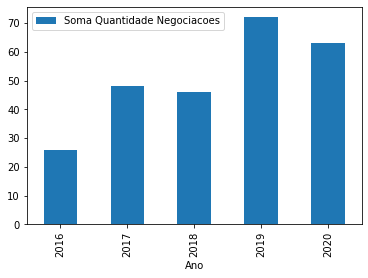

In [ ]:
# Resposta do exercício

import matplotlib.pyplot as plt 

resposta = spark.sql(query).toPandas()
resposta.plot(
    x='Ano',
    y='Soma Quantidade Negociacoes',
    kind = 'bar'
    )

plt.show()

## Exercício 3 

Qual o total de despesas em salários nos anos de 2016 a 2020 em cada região na qual a equipe está localizada, considerando o cargo de nível junior? Arredonde a soma dos salários para até duas casas decimais. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "ANO", "REGIAO", "TOTALDESPESA". Ordene as linhas exibidas primeiro pelo total de despesa em ordem descendente, e depois pelo ano em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das strings.

In [ ]:
# Resposta do exercício

query = """
SELECT dataAno AS `ANO`, filialRegiaoNome AS `REGIAO`, ROUND(SUM(salario), 2) AS `TOTALDESPESA`
FROM pagamento JOIN data ON data.dataPK = pagamento.dataPK 
               JOIN cargo ON cargo.cargoPK = pagamento.cargoPK
               JOIN equipe ON equipe.equipePK = pagamento.equipePK
WHERE cargoNivel = 'JUNIOR'
  AND dataAno >= 2016
  AND dataAno <= 2020 
GROUP BY dataAno, filialRegiaoNome
ORDER BY TOTALDESPESA DESC, dataAno DESC
"""

spark.sql(query).show()

+----+------------+------------+
| ANO|      REGIAO|TOTALDESPESA|
+----+------------+------------+
|2020|     SUDESTE|  1257808.68|
|2019|     SUDESTE|  1257808.68|
|2018|     SUDESTE|  1056208.92|
|2017|     SUDESTE|   876154.56|
|2016|     SUDESTE|   489456.84|
|2020|CENTRO-OESTE|   337073.28|
|2019|CENTRO-OESTE|   337073.28|
|2018|CENTRO-OESTE|   337073.28|
|2020|    NORDESTE|    160832.4|
|2019|    NORDESTE|    160832.4|
|2017|CENTRO-OESTE|   154488.24|
+----+------------+------------+



## Exercício 4 

Mostre o resultado do Exercício 3 usando um diagrama de barras que permite a visualização dos resultados por região.

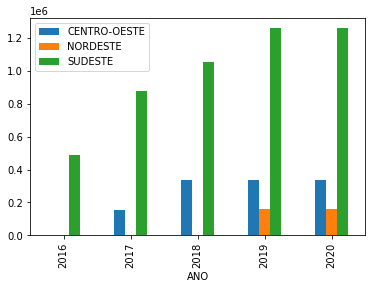

In [ ]:
# Resposta do exercício

resposta = spark.sql(query).toPandas()

legend = ['CENTRO-OESTE', 'NORDESTE', 'SUDESTE']
ax = resposta.set_index(['ANO', 'REGIAO']).unstack().plot(kind = 'bar')
ax.legend(legend);

plt.show()

## Exercício 5 

Liste o total dos salários e o total de receitas recebidas, considerando os anos de 2017, 2018 e 2019. Arredonde o total dos salários para até duas casas decimais. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "ANO", "TOTAL GASTO EM SALARIOS", "TOTAL DE RECEITAS RECEBIDAS". Ordene as linhas exibidas pelo ano em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.


In [ ]:
# Resposta do exercício

query = """
SELECT tabSalario.ANO,
      `TOTAL GASTO EM SALARIOS`,
      `TOTAL DE RECEITAS RECEBIDAS`
FROM (
  SELECT dataAno AS `ANO`, ROUND(SUM(salario), 2) AS `TOTAL GASTO EM SALARIOS`
  FROM data JOIN pagamento ON data.dataPK = pagamento.dataPK
  WHERE dataAno BETWEEN 2017 AND 2019
  GROUP BY dataAno
) AS tabSalario
JOIN (
  SELECT dataAno AS `ANO`, ROUND(SUM(receita), 2) AS `TOTAL DE RECEITAS RECEBIDAS`
  FROM data JOIN negociacao ON data.dataPK = negociacao.dataPK
  WHERE dataAno BETWEEN 2017 AND 2019
  GROUP BY dataAno  
) AS tabReceita
ON tabSalario.ANO = tabReceita.ANO
ORDER BY tabSalario.ANO DESC
"""

spark.sql(query).show()

+----+-----------------------+---------------------------+
| ANO|TOTAL GASTO EM SALARIOS|TOTAL DE RECEITAS RECEBIDAS|
+----+-----------------------+---------------------------+
|2019|          1.856766636E7|               3.53533183E7|
|2018|           1.49355264E7|              1.159353965E7|
|2017|              9775279.8|                 7200423.35|
+----+-----------------------+---------------------------+



## Exercício 6 

Mostre o resultado do Exercício 5 usando um diagrama de barras.

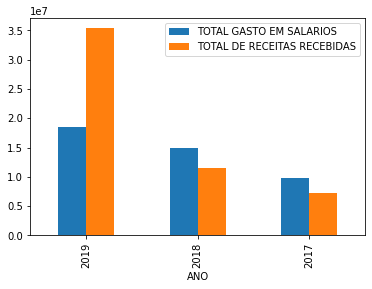

In [ ]:
# Resposta do exercício

resposta = spark.sql(query).toPandas()
resposta.set_index(['ANO']).plot(kind = 'bar')

plt.show()

## Exercício 7


Compare a quantidade de negociações que cada uma das equipes realizou nos anos de 2018 e 2019. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "NOME DA EQUIPE", "NOME DA FILIAL", "NEGOCIACOES 2018", "NEGOCIACOES 2019". Ordene as linhas exibidas pelo nome da equipe em ordem ascendente e depois pelo nome da filial em ordem ascendente. Liste as primeiras 25 linhas da resposta, sem truncamento das strings.

Dica: Considere relacionar as equipes por meio da operação drill-across.

In [ ]:
query = """
SELECT negociacoes2018.equipeNome AS `NOME DA EQUIPE`,
       negociacoes2018.filialNome AS `NOME DA FILIAL`,
       total2018 AS `NEGOCIACOES2018`,
       total2019 AS `NEGOCIACOES2019`
FROM ( SELECT negociacao.equipePK, equipeNome, filialNome, SUM(CAST(quantidadeNegociacoes AS INTEGER)) AS total2018
       FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK
                       JOIN equipe ON equipe.equipePK = negociacao.equipePK
       WHERE dataAno = 2018
       GROUP BY negociacao.equipePK, equipeNome, filialNome
     ) AS negociacoes2018
     JOIN 
     ( SELECT negociacao.equipePK, equipeNome, filialNome, SUM(CAST(quantidadeNegociacoes AS INTEGER)) AS total2019
       FROM negociacao JOIN data ON data.dataPK = negociacao.dataPK
                       JOIN equipe ON equipe.equipePK = negociacao.equipePK
       WHERE dataAno = 2019
       GROUP BY negociacao.equipePK, equipeNome, filialNome  
     ) AS negociacoes2019
     ON negociacoes2018.equipePK = negociacoes2019.equipePK
ORDER BY negociacoes2018.equipeNome, negociacoes2018.filialNome
"""

spark.sql(query).show()

+--------------+--------------------+---------------+---------------+
|NOME DA EQUIPE|      NOME DA FILIAL|NEGOCIACOES2018|NEGOCIACOES2019|
+--------------+--------------------+---------------+---------------+
| APP - DESKTOP|RIO DE JANEIRO - ...|            149|            135|
| APP - DESKTOP|SAO PAULO - AV. P...|            132|            135|
|  APP - MOBILE|CAMPO GRANDE - CE...|             98|             88|
|  APP - MOBILE|RIO DE JANEIRO - ...|             99|            112|
|  APP - MOBILE|SAO PAULO - AV. P...|            104|            108|
|           WEB|CAMPO GRANDE - CE...|            100|             95|
|           WEB|RIO DE JANEIRO - ...|             91|            106|
|           WEB|SAO PAULO - AV. P...|             76|             87|
+--------------+--------------------+---------------+---------------+



## Exercício 8 

Liste os setores dos clientes e a soma de suas respectivas receitas para o segundo semestre do ano de 2020. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "SETOR DO CLIENTE", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo total de receitas em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
# Resposta do exercício

query = """
SELECT clienteSetor AS `SETOR DO CLIENTE`,
       ROUND(SUM(receita),2) AS `TOTAL DE RECEITAS`
FROM negociacao JOIN data ON negociacao.dataPK = data.dataPK 
                JOIN cliente ON negociacao.clientePK = cliente.clientePK
WHERE dataAno = 2020 
  AND dataSemestre = 2
GROUP BY clienteSetor
ORDER BY `TOTAL DE RECEITAS` DESC
"""

spark.sql(query).show()

+-------------------+-----------------+
|   SETOR DO CLIENTE|TOTAL DE RECEITAS|
+-------------------+-----------------+
|BEBIDAS E ALIMENTOS|        5749704.7|
|              SAUDE|        3119775.3|
|         TECNOLOGIA|       2465926.05|
|          VESTUARIO|        2336266.5|
|            CREDITO|         998789.6|
+-------------------+-----------------+



## Exercício 9 

Analise a resposta do Exercício 8 para identificar qual o setor do cliente que obteve o maior total de receitas. Mostre o total de receitas por mês para esse setor do cliente, considerando o segundo semestre do ano de 2020. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "MES", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo total de receitas em ordem descendente e depois pelo mês em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
# Resposta do exercício

query = """
SELECT dataMes AS `MES` ,
       ROUND(SUM(receita),2) as `TOTAL DE RECEITAS`
FROM negociacao JOIN data ON negociacao.dataPK = data.dataPK
                JOIN cliente ON negociacao.clientePK = cliente.clientePK
WHERE dataAno = 2020 
  AND dataSemestre = 2 
  AND clienteSetor = 'BEBIDAS E ALIMENTOS'
GROUP BY dataMes
ORDER BY `TOTAL DE RECEITAS` DESC, `MES` DESC
"""

spark.sql(query).show()

+---+-----------------+
|MES|TOTAL DE RECEITAS|
+---+-----------------+
| 11|        1156403.3|
| 10|        1091389.5|
| 12|         899122.7|
|  9|        877223.55|
|  8|         875934.3|
|  7|        849631.35|
+---+-----------------+



## Exercício 10 

Analise a resposta do Exercício 9 para identificar qual mês gerou o maior total de receitas para o setor de cliente identificado no Exercício 8. Mostre o total de receitas das equipes, considerando o segundo semestre do ano de 2020, o setor de cliente identificado no Exercício 8 e o mês identificado no Exercício 9. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "NOME DA EQUIPE", "NOME DA FILIAL", "TOTAL DE RECEITAS". Ordene as linhas exibidas pelo nome da equipe em ordem ascendente, e depois pelo nome da filial em ordem ascendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
# Resposta do exercício

query = """
SELECT equipeNome as `NOME DA EQUIPE`,
       filialNome as `NOME DA FILIAL`,
       ROUND(SUM(receita),2) as `TOTAL DE RECEITAS`
FROM negociacao JOIN data ON negociacao.dataPK = data.dataPK
                JOIN cliente ON negociacao.clientePK = cliente.clientePK
                JOIN equipe ON negociacao.equipePK = equipe.equipePK
WHERE dataAno = 2020 
  AND dataSemestre = 2 
  AND clienteSetor = 'BEBIDAS E ALIMENTOS'
  AND dataMes = 11
GROUP BY equipeNome, filialNome
ORDER BY equipeNome, filialNome
"""

spark.sql(query).show()

+--------------+--------------------+-----------------+
|NOME DA EQUIPE|      NOME DA FILIAL|TOTAL DE RECEITAS|
+--------------+--------------------+-----------------+
| APP - DESKTOP|RIO DE JANEIRO - ...|         35645.65|
| APP - DESKTOP|SAO PAULO - AV. P...|         129409.4|
|  APP - MOBILE|CAMPO GRANDE - CE...|         48714.45|
|  APP - MOBILE|RIO DE JANEIRO - ...|          62138.7|
|  APP - MOBILE|SAO PAULO - AV. P...|         26571.85|
|BI & ANALYTICS|     RECIFE - CENTRO|        527169.75|
|BI & ANALYTICS|SAO PAULO - AV. P...|        149490.15|
|           WEB|CAMPO GRANDE - CE...|         20042.75|
|           WEB|RIO DE JANEIRO - ...|          68596.1|
|           WEB|SAO PAULO - AV. P...|          88624.5|
+--------------+--------------------+-----------------+



## Exercício 11

Liste todas as agregações que podem ser geradas a partir da média dos salários por ano por nome do estado da filial, considerando as equipes localizadas na região de nome SUDESTE. Devem ser exibidas as colunas na ordem e com os nomes especificados a seguir: "ANO", "ESTADO DA FILIAL", "MEDIA DE SALARIOS". Ordene as linhas exibidas pelo estado da filial em ordem descendente, e depois pelo ano em ordem descendente. Liste as primeiras 25 linhas da resposta, sem truncamento das *strings*.

In [ ]:
query = """
SELECT dataAno AS ANO,
       filialEstadoNome AS `ESTADO DA FILIAL`,
       ROUND(AVG(salario), 2) AS `MEDIA DE SALARIOS`
FROM pagamento JOIN data ON data.dataPK = pagamento.dataPK
               JOIN equipe ON equipe.equipePK = pagamento.equipePK
               JOIN cargo ON cargo.cargoPK = pagamento.cargoPK
WHERE filialRegiaoNome = "SUDESTE"
GROUP BY CUBE (dataAno, filialEstadoNome)
ORDER BY `ESTADO DA FILIAL` DESC, ANO DESC 
"""

spark.sql(query).show()

+----+----------------+-----------------+
| ANO|ESTADO DA FILIAL|MEDIA DE SALARIOS|
+----+----------------+-----------------+
|2020|       SAO PAULO|          7948.39|
|2019|       SAO PAULO|          7948.39|
|2018|       SAO PAULO|          7986.58|
|2017|       SAO PAULO|           7639.4|
|2016|       SAO PAULO|          7735.52|
|null|       SAO PAULO|          7885.68|
|2020|  RIO DE JANEIRO|          7914.97|
|2019|  RIO DE JANEIRO|          7914.97|
|2018|  RIO DE JANEIRO|          7914.97|
|2017|  RIO DE JANEIRO|          7596.64|
|2016|  RIO DE JANEIRO|          7073.21|
|null|  RIO DE JANEIRO|          7767.22|
|2020|            null|          7935.17|
|2019|            null|          7935.17|
|2018|            null|          7953.29|
|2017|            null|          7621.71|
|2016|            null|          7404.36|
|null|            null|          7835.47|
+----+----------------+-----------------+

